In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.shape

(1032, 16)

In [4]:
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


In [8]:
df.nunique()

age                 65
Workclass            6
fnlwgt            1014
education           16
education-num       16
marital-status       7
occupation          14
relationship         6
race                 5
sex                  2
capital-gain        33
capital-loss        31
hours-per-week      54
native-country      30
Income               2
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


In [10]:
df_num = df.select_dtypes("int64")
df_cat = df.select_dtypes("object")

In [11]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [14]:
df = pd.concat([df_num,df_cat],axis=1)

In [15]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,0,5,9,4,0,1,4,1,28
1,50,83311,13,0,0,13,0,4,9,2,3,0,4,1,28
2,38,215646,9,0,0,40,0,2,11,0,5,1,4,1,28
3,53,234721,7,0,0,40,0,2,1,2,5,0,2,1,28
4,28,338409,13,0,0,40,0,2,9,2,9,5,2,0,4


In [16]:
cat_col = ["Workclass","education","marital-status","occupation","relationship","race","sex","native-country","Income"]
num_col = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]

In [17]:
df_num = df[num_col]
df_cat = df[cat_col]

In [18]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,5,9,4,0,1,4,1,28,0
1,4,9,2,3,0,4,1,28,0
2,2,11,0,5,1,4,1,28,0
3,2,1,2,5,0,2,1,28,0
4,2,9,2,9,5,2,0,4,0


In [19]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [20]:
df_num.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000


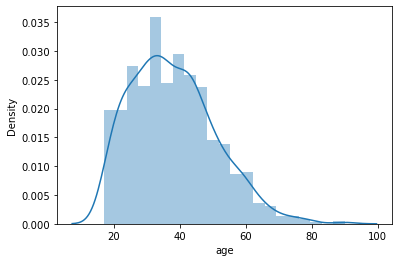

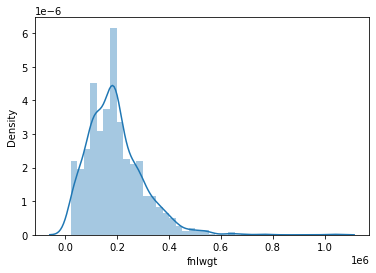

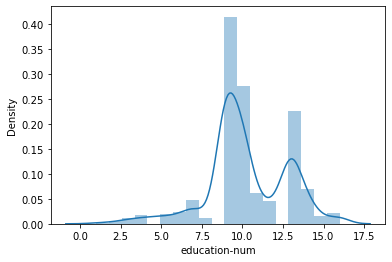

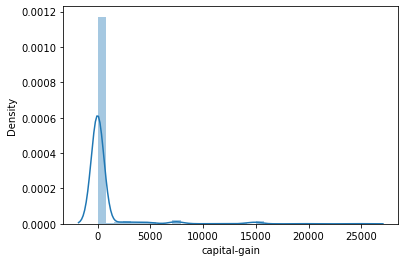

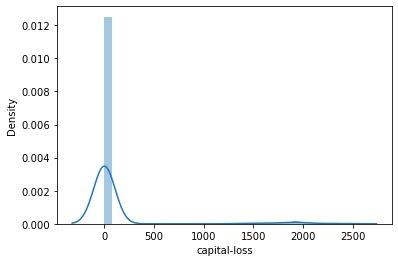

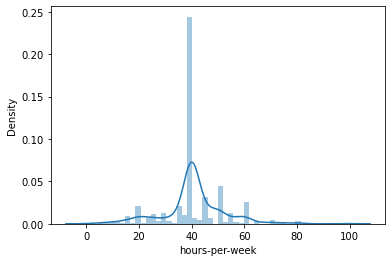

In [21]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

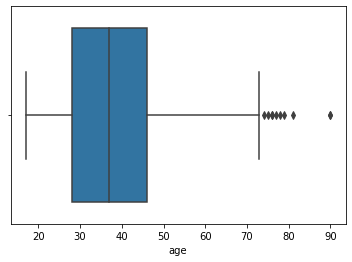

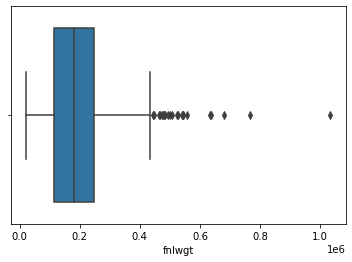

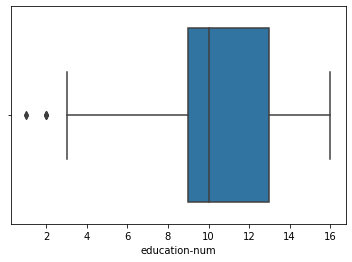

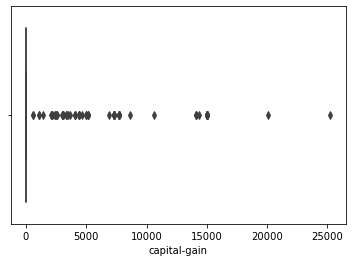

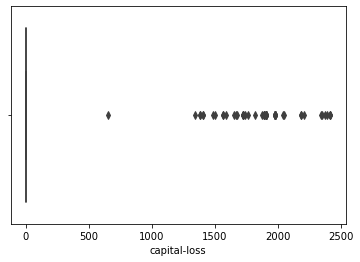

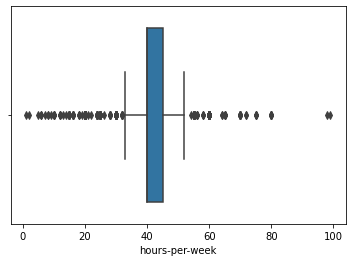

In [22]:
for col in df_num:
    plt.figure()
    sns.boxplot(data=df_num, x=col)
    plt.show()

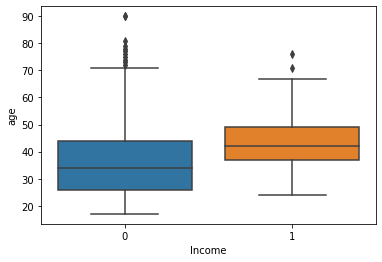

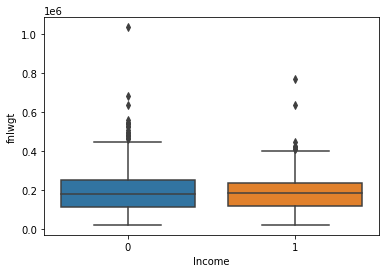

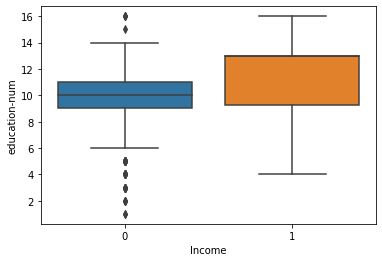

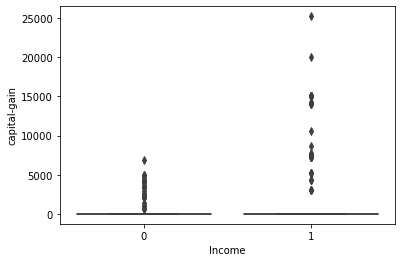

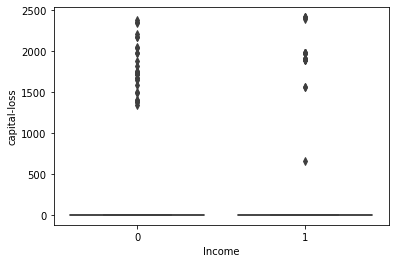

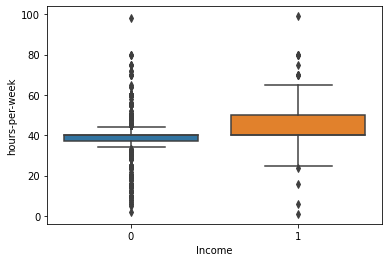

In [23]:
for col in df_num:
    plt.figure()
    sns.boxplot(data=df, y=col, x="Income")
    plt.show()

In [24]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,5,9,4,0,1,4,1,28,0
1,4,9,2,3,0,4,1,28,0
2,2,11,0,5,1,4,1,28,0
3,2,1,2,5,0,2,1,28,0
4,2,9,2,9,5,2,0,4,0


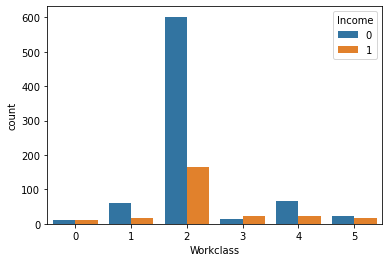

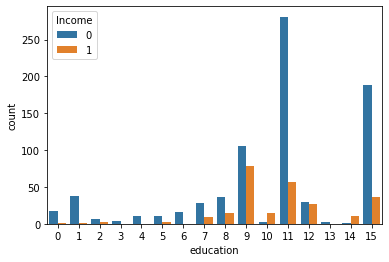

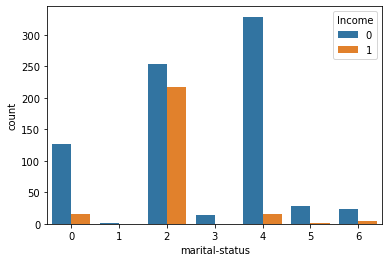

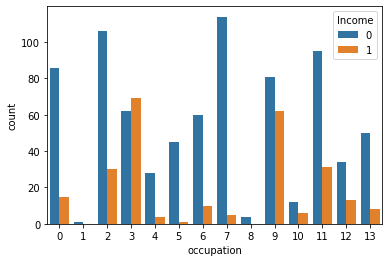

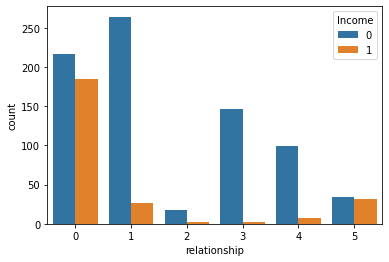

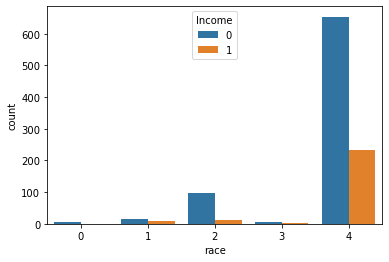

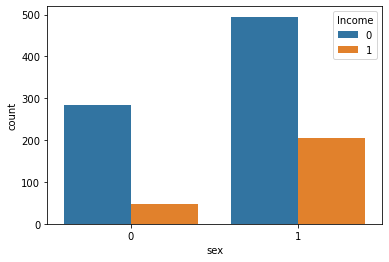

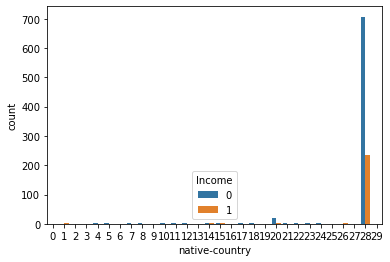

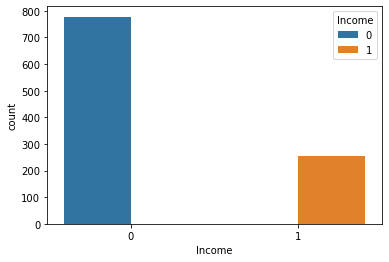

In [25]:
for col in df_cat:
    plt.figure()
    sns.countplot(data=df, x=col, hue="Income")
    plt.show()

In [26]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [27]:
# Baesline module


X = df.drop("Income",axis=1)
y = df["Income"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
accuracy_score(y_test,y_pred)

0.8

In [35]:
recall_score(y_test,y_pred)

0.2638888888888889

In [36]:
precision_score(y_test,y_pred)

0.6785714285714286

In [37]:
f1_score(y_test,y_pred)

0.38

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310



In [40]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [41]:
print(tp,fp)
print(fn,tn)

19 9
53 229


In [42]:
# model 2
df_num["capital-gain"] = np.sqrt(df_num["capital-gain"])
df_num["capital-loss"] = np.sqrt(df_num["capital-loss"])

In [43]:
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])

In [44]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [45]:
df_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,0.081561,-1.064668,1.111052,1.769640,-0.240712,-0.060217,5,9,4,0,1,4,1,28,0
1,0.939653,-1.010697,1.111052,-0.271816,-0.240712,-2.361827,4,9,2,3,0,4,1,28,0
2,0.003553,0.221791,-0.488677,-0.271816,-0.240712,-0.060217,2,11,0,5,1,4,1,28,0
3,1.173678,0.399444,-1.288541,-0.271816,-0.240712,-0.060217,2,1,2,5,0,2,1,28,0
4,-0.776531,1.365131,1.111052,-0.271816,-0.240712,-0.060217,2,9,2,9,5,2,0,4,0


In [46]:
X = df_new.drop("Income",axis=1)
y = df_new["Income"]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       238
           1       0.75      0.42      0.54        72

    accuracy                           0.83       310
   macro avg       0.80      0.69      0.72       310
weighted avg       0.82      0.83      0.81       310



In [53]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [54]:
print(tp,fp)
print(fn,tn)

30 10
42 228
